In [1]:
%load_ext autoreload
%autoreload 2
import pickle
from MARBLE import utils, plotting, net, postprocessing, geometry

import matplotlib.pyplot as plt

# Visualise a single condition in a single session

In [13]:
pos, vel = pickle.load(open('../outputs/spiking_data/raw_data_session_1','rb'))

In [35]:
data = pickle.load(open('../outputs/spiking_data/data_object_session_43.pkl','rb'))
#data = utils.construct_dataset(pos, features=vel, graph_type='cknn', k=30, stop_crit=0.02, delta=1, n_evec=2,
#                               n_nodes=None, n_workers=1, n_geodesic_nb=10, compute_laplacian=True, vector=False)
#plotting.fields(data, width=0.03)

# Train model on all conditions and sessions

In [37]:
par = {'epochs': 150, #optimisation epochs
               'order': 2, #order of derivatives
               'hidden_channels': 100, #number of internal dimensions in MLP
               'out_channels': 6,
               'inner_product_features': False,
               'vec_norm': False,
               'diffusion': True,
              }
    
model = net(data, **par, loadpath='./outputs/best_model.pth')#, loadpath='../outputs/spiking_data/session_0/best_model.pth')
    
#model.run_training(data, use_best=True)#, outdir='../outputs/spiking_data/session_0') 


---- Settings: 

epochs : 150
order : 2
hidden_channels : 100
out_channels : 6
inner_product_features : False
vec_norm : False
diffusion : True
batch_size : 64
lr : 0.01
momentum : 0.9
include_positions : False
frac_sampled_nb : -1
dropout : 0.0
n_lin_layers : 2
bias : True
batch_norm : None
seed : 0
processes : 1
dim_signal : 5
dim_emb : 5
n_sampled_nb : -1

---- Number of features to pass to the MLP:  155
---- Total number of parameters:  16207


In [38]:
data = model.evaluate(data)
data = postprocessing(data, n_clusters=50)

Performed umap embedding on embedded results.


<AxesSubplot:>

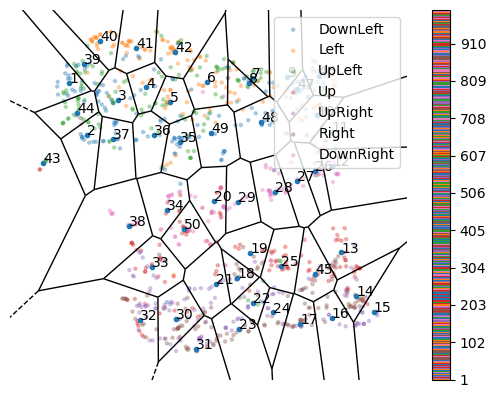

In [39]:
conditions = ['DownLeft','Left','UpLeft','Up','UpRight','Right','DownRight']
plotting.embedding(data, data.y.numpy().astype(int), titles=conditions)

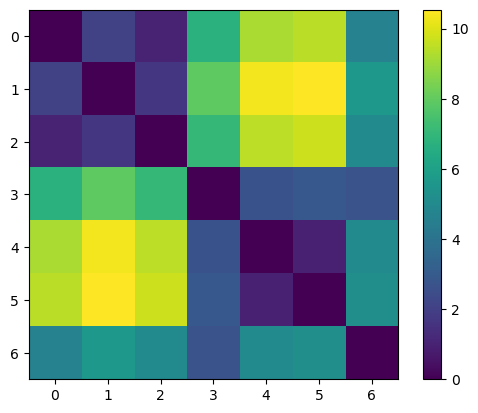

In [40]:
plt.imshow(data.dist); plt.colorbar()  

Performed MDS embedding on embedded results.


<AxesSubplot:>

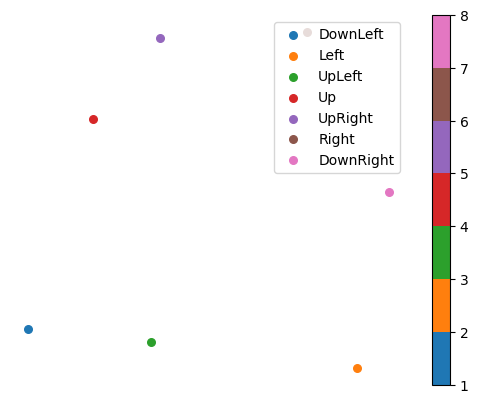

In [41]:
emb_MDS, _ = geometry.embed(data.dist, embed_typ = 'MDS')
labels = [i for i in range(len(conditions))]
plotting.embedding(emb_MDS, labels, titles=conditions, s=30, alpha=1)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
rates = pickle.load(open('../outputs/spiking_data/rate_data_1ms.pkl','rb'))       

# definingf the set of conditions     
conditions=['DownLeft','Left','UpLeft','Up','UpRight','Right','DownRight']    
    
# list of days
days = rates.keys()
    
# define some parameters
pca_n = 5
      
# storing all distance matrices
embeddings = []
distance_matrices = []
    

times = [];
all_condition_labels = [];
    
# loop over each day
for day in days:
        
        # first stack all trials from that day together and fit pca
        print(day)
        pos = []            
        # loop over each condition on that day
        for c, cond in enumerate(conditions):

            # go cue at 500ms
            data = rates[day][cond][:,500:,:]
            
            # loop over all trials
            for trial in data:
                # store each trial as time x channels
                pos.append(trial)
              
        # stacking all trials into a single array (time x channels)
        pos = np.vstack(pos)
        print(pos.shape)
        
        # fit PCA to all data across all conditions on a given day simultaneously
        pca = PCA(n_components=pca_n)
        pca.fit(pos)     
        print(pca.explained_variance_ratio_)  

In [ ]:
rates[day][cond].shape